Sveučilište u Zagrebu  
Fakultet elektrotehnike i računarstva  
  
## Strojno učenje 1 2021/2022  
http://www.fer.unizg.hr/predmet/struce1

------------------------------

### Regresija

*Verzija: 1.0
Zadnji put ažurirano: 1. 10. 2021.*

(c) 2015-2021 Jan Šnajder, Domagoj Alagić 

Rok za predaju: **24. listopada 2021. u 23:59h**

------------------------------

### Upute

Prva laboratorijska vježba sastoji se od četiri zadatka, te tri dodatna zadatka koji se **ne boduju**. U nastavku slijedite upute navedene u ćelijama s tekstom. Rješavanje vježbe svodi se na **dopunjavanje ove bilježnice**: umetanja ćelije ili više njih **ispod** teksta zadatka, pisanja odgovarajućeg kôda te evaluiranja ćelija. 

Osigurajte da u potpunosti **razumijete** kôd koji ste napisali. Kod predaje vježbe, morate biti u stanju na zahtjev asistenta (ili demonstratora) preinačiti i ponovno evaluirati Vaš kôd. Nadalje, morate razumjeti teorijske osnove onoga što radite, u okvirima onoga što smo obradili na predavanju. Ispod nekih zadataka možete naći i pitanja koja služe kao smjernice za bolje razumijevanje gradiva (**nemojte pisati** odgovore na pitanja u bilježnicu). Stoga se nemojte ograničiti samo na to da riješite zadatak, nego slobodno eksperimentirajte. To upravo i jest svrha ovih vježbi.

Vježbe trebate raditi **samostalno**. Možete se konzultirati s drugima o načelnom načinu rješavanja, ali u konačnici morate sami odraditi vježbu. U protivnome vježba nema smisla.

In [1]:
# Učitaj osnovne biblioteke...
import numpy as np
import sklearn
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### 1. Jednostavna regresija

Zadan je skup primjera $\mathcal{D}=\{(x^{(i)},y^{(i)})\}_{i=1}^4 = \{(0,4),(1,1),(2,2),(4,5)\}$. Primjere predstavite matricom $\mathbf{X}$ dimenzija $N\times n$ (u ovom slučaju $4\times 1$) i vektorom oznaka $\textbf{y}$, dimenzija $N\times 1$ (u ovom slučaju $4\times 1$), na sljedeći način:


In [2]:
X = np.array([[0],[1],[2],[4]])
y = np.array([4,1,2,5])

### (a)

Proučite funkciju [`PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) iz biblioteke `sklearn` i upotrijebite je za generiranje matrice dizajna $\mathbf{\Phi}$ koja ne koristi preslikavanje u prostor više dimenzije (samo će svakom primjeru biti dodane *dummy* jedinice; $m=n+1$).


In [3]:
from sklearn.preprocessing import PolynomialFeatures
# Vaš kôd ovdje

poly = PolynomialFeatures(1, interaction_only=False)
design_matrix = poly.fit_transform(X)
print('Matrica dizajna\n')
print(design_matrix)
# print(poly.get_params())
# print(poly.get_feature_names())

Matrica dizajna

[[1. 0.]
 [1. 1.]
 [1. 2.]
 [1. 4.]]


### (b)

Upoznajte se s modulom [`linalg`](http://docs.scipy.org/doc/numpy/reference/routines.linalg.html). Izračunajte težine $\mathbf{w}$ modela linearne regresije kao $\mathbf{w}=(\mathbf{\Phi}^\intercal\mathbf{\Phi})^{-1}\mathbf{\Phi}^\intercal\mathbf{y}$. Zatim se uvjerite da isti rezultat možete dobiti izračunom pseudoinverza $\mathbf{\Phi}^+$ matrice dizajna, tj. $\mathbf{w}=\mathbf{\Phi}^+\mathbf{y}$, korištenjem funkcije [`pinv`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.pinv.html).

In [4]:
from numpy import linalg
# Vaš kôd ovdje

design_matrix_transpose = design_matrix.transpose()
weights = np.linalg.inv(np.dot(design_matrix_transpose, design_matrix))
weights = np.dot(weights, design_matrix_transpose)
weights = np.dot(weights, y)
print('Izračun težina s modulom linalg: ' + str(weights))

pseudoinverse = np.linalg.pinv(design_matrix)
weights_b = np.dot(pseudoinverse, y.transpose())
print('Izračun težina korištenjem funkcije pinv: ' + str(weights_b))

Izračun težina s modulom linalg: [2.2        0.45714286]
Izračun težina korištenjem funkcije pinv: [2.2        0.45714286]


Radi jasnoće, u nastavku je vektor $\mathbf{x}$ s dodanom *dummy* jedinicom $x_0=1$ označen kao $\tilde{\mathbf{x}}$.

### (c)

Prikažite primjere iz $\mathcal{D}$ i funkciju $h(\tilde{\mathbf{x}})=\mathbf{w}^\intercal\tilde{\mathbf{x}}$. Izračunajte pogrešku učenja prema izrazu $E(h|\mathcal{D})=\frac{1}{2}\sum_{i=1}^N(\tilde{\mathbf{y}}^{(i)} - h(\tilde{\mathbf{x}}^{(i)}))^2$. Možete koristiti funkciju srednje kvadratne pogreške [`mean_squared_error`]( http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) iz modula [`sklearn.metrics`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics).

**Q:** Gore definirana funkcija pogreške $E(h|\mathcal{D})$ i funkcija srednje kvadratne pogreške nisu posve identične. U čemu je razlika? Koja je "realnija"?

In [5]:
from sklearn.metrics import mean_squared_error
# Vaš kôd ovdje

y_pred = np.dot(weights, design_matrix.transpose())
print('Predikcije -> ' + str(y_pred))
print('Pogreška učenja iznosi ' + str(1/2 * len(y) * mean_squared_error(y, y_pred)))

Predikcije -> [2.2        2.65714286 3.11428571 4.02857143]
Pogreška učenja iznosi 4.085714285714285


### (d)

Uvjerite se da za primjere iz $\mathcal{D}$ težine $\mathbf{w}$ ne možemo naći rješavanjem sustava $\mathbf{w}=\mathbf{\Phi}^{-1}\mathbf{y}$, već da nam doista treba pseudoinverz.

**Q:** Zašto je to slučaj? Bi li se problem mogao riješiti preslikavanjem primjera u višu dimenziju? Ako da, bi li to uvijek funkcioniralo, neovisno o skupu primjera $\mathcal{D}$? Pokažite na primjeru.

In [6]:
# Vaš kôd ovdje

# Vaš kôd ovdje

# weights_3 = np.dot(np.linalg.inv(design_matrix), y)

# poly_d = PolynomialFeatures(3, interaction_only=False)
# print(np.dot(np.linalg.inv(poly_d.fit_transform(X)), y))

### (e) 

Proučite klasu [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) iz modula [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model). Provjerite jesu li težine koje izračunava ta funkcija (dostupne pomoću atributa `coef_` i `intercept_`) jednake onima koje ste izračunali gore. Ako nisu, prilagodite kôd tako da jest.

**NB:** Obratite pozornost na to kako klase [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) i [`PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) koriste pomak i osigurajte da ga ne dodajete više puta.

Izračunajte predikcije modela (metoda `predict`) i uvjerite se da je pogreška učenja identična onoj koju ste ranije izračunali.

In [7]:
from sklearn.linear_model import LinearRegression
# Vaš kôd ovdje

reg = LinearRegression().fit(design_matrix, y)
print('Težine ' + str(reg.coef_))
print('Težina w0 -> ' + str(reg.intercept_) + '\n')
print('Predicije dobivene pomoću klase LinearRegression\n\n' + str(reg.predict(design_matrix)))

Težine [0.         0.45714286]
Težina w0 -> 2.2

Predicije dobivene pomoću klase LinearRegression

[2.2        2.65714286 3.11428571 4.02857143]


### 2. Polinomijalna regresija i utjecaj šuma

### (a)

Razmotrimo sada regresiju na većem broju primjera. Definirajte funkciju `make_labels(X, f, noise=0)` koja uzima matricu neoznačenih primjera $\mathbf{X}_{N\times n}$ te generira vektor njihovih oznaka $\mathbf{y}_{N\times 1}$. Oznake se generiraju kao $y^{(i)} = f(x^{(i)})+\mathcal{N}(0,\sigma^2)$, gdje je $f:\mathbb{R}^n\to\mathbb{R}$ stvarna funkcija koja je generirala podatke (koja nam je u stvarnosti nepoznata), a $\sigma$ je standardna devijacija Gaussovog šuma, definirana parametrom `noise`. Za generiranje šuma možete koristiti funkciju [`numpy.random.normal`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html). 

Generirajte skup za učenje od $N=50$ primjera uniformno distribuiranih u intervalu $[-5,5]$ pomoću funkcije $f(x) = 5 + x -2 x^2 -5 x^3$ uz šum  $\sigma=200$:

In [8]:
from numpy.random import normal
def make_labels(X, f, noise=0):
    # Vaš kôd ovdje
    
    y = []
    for row in X:
        y.append(f(row[0]) + np.random.normal(0, 200))
    return np.array(y)

In [9]:
def make_instances(x1, x2, N) :
    return np.array([np.array([x]) for x in np.linspace(x1,x2,N)])

In [10]:
# Vaš kôd ovdje

def function(x):
    return 5 + x - 2*x**2 - 5*x**3

X_2_a = make_instances(-5, 5, 50)
y_2_a = make_labels(X_2_a, function, noise = 200)

print('Oznake dobivene funkcijom make_labels:\n\n' + str(y_2_a))

Oznake dobivene funkcijom make_labels:

[ 448.66053145  234.48864811  536.32838425  255.29202341  313.91285252
  315.30397941  313.81895809  212.27593481  -50.53946367  173.96153104
  466.53020637  121.1533225    74.16990436 -210.79893942  580.44823419
  159.30803345  169.02084656 -330.68406504  248.47014716  560.82533366
 -120.33916248  -30.63681949 -194.51717276  266.60608529  349.8620023
 -218.79939978 -345.70717288   76.53955433   -7.36492362 -277.76772683
  285.58521589 -258.45472974  -52.24888939 -212.51236368 -262.67015318
 -408.07054396 -155.20923294 -212.03133052 -139.43329307  -15.34404987
 -253.84911898 -100.86549202 -355.25226047 -492.48254528 -536.70123993
 -156.72313121 -170.25131612 -491.85306109 -855.22141993 -504.2744692 ]


Prikažite taj skup funkcijom [`scatter`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter).

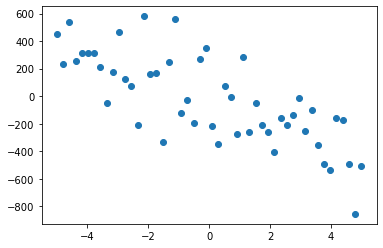

In [11]:
# Vaš kôd ovdje

plt.scatter(X_2_a, y_2_a)
plt.show()

### (b)

Trenirajte model polinomijalne regresije stupnja $d=3$. Na istom grafikonu prikažite naučeni model $h(\mathbf{x})=\mathbf{w}^\intercal\tilde{\mathbf{x}}$ i primjere za učenje. Izračunajte pogrešku učenja modela.

Predikcije dobivene pomoću klase LinearRegression

[ 404.78498689  377.49487383  351.66885957  327.2341554   304.11797261
  282.2475225   261.55001636  241.95266549  223.38268118  205.76727472
  189.03365741  173.10904054  157.92063541  143.3956533   129.46130552
  116.04480336  103.0733581    90.47418106   78.17448351   66.10147675
   54.18237208   42.34438079   30.51471417   18.62058353    6.58920014
   -5.65222469  -18.17647967  -31.0563535   -44.3646349   -58.17411256
  -72.5575752   -87.58781152 -103.33761023 -119.87976003 -137.28704962
 -155.63226772 -174.98820304 -195.42764427 -217.02338012 -239.8481993
 -263.97489052 -289.47624248 -316.42504388 -344.89408344 -374.95614986
 -406.68403185 -440.1505181  -475.42839734 -512.59045825 -551.70948956]

Pogreška učenja: 85623.78519845793


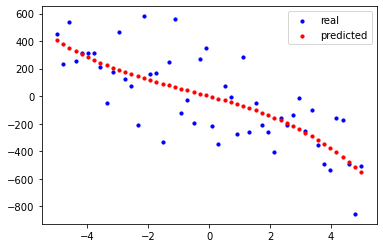

In [12]:
# Vaš kôd ovdje

poly_2_b = PolynomialFeatures(3, interaction_only=False)
design_matrix_2_b = poly_2_b.fit_transform(X_2_a)

reg = LinearRegression().fit(design_matrix_2_b, y_2_a)
# print(reg.coef_)
# print(reg.intercept_)
print('Predikcije dobivene pomoću klase LinearRegression\n\n' + str(reg.predict(design_matrix_2_b)))
print('\nPogreška učenja: ' +  str(1/2 * len(y) * mean_squared_error(y_2_a, reg.predict(design_matrix_2_b))))

figure = plt.figure()
axes = figure.add_subplot(111)

axes.scatter(X_2_a, y_2_a, s=10, c='b', label='real')
axes.scatter(X_2_a, reg.predict(design_matrix_2_b), s=10, c='r', label='predicted')
plt.legend(loc='upper right');
plt.show()

### 3. Odabir modela

### (a)

Na skupu podataka iz zadatka 2 trenirajte pet modela linearne regresije $\mathcal{H}_d$ različite složenosti, gdje je $d$ stupanj polinoma, $d\in\{1,3,5,10,20\}$. Prikažite na istome grafikonu skup za učenje i funkcije $h_d(\mathbf{x})$ za svih pet modela (preporučujemo koristiti `plot` unutar `for` petlje). Izračunajte pogrešku učenja svakog od modela.

**Q:** Koji model ima najmanju pogrešku učenja i zašto?


Pogreška učenja za polinom stupnja 1 : 1103867.3539818088

Pogreška učenja za polinom stupnja 3 : 1070297.3149807241

Pogreška učenja za polinom stupnja 5 : 1050647.7627171539

Pogreška učenja za polinom stupnja 10 : 1041111.5719489695

Pogreška učenja za polinom stupnja 20 : 836613.5701242787


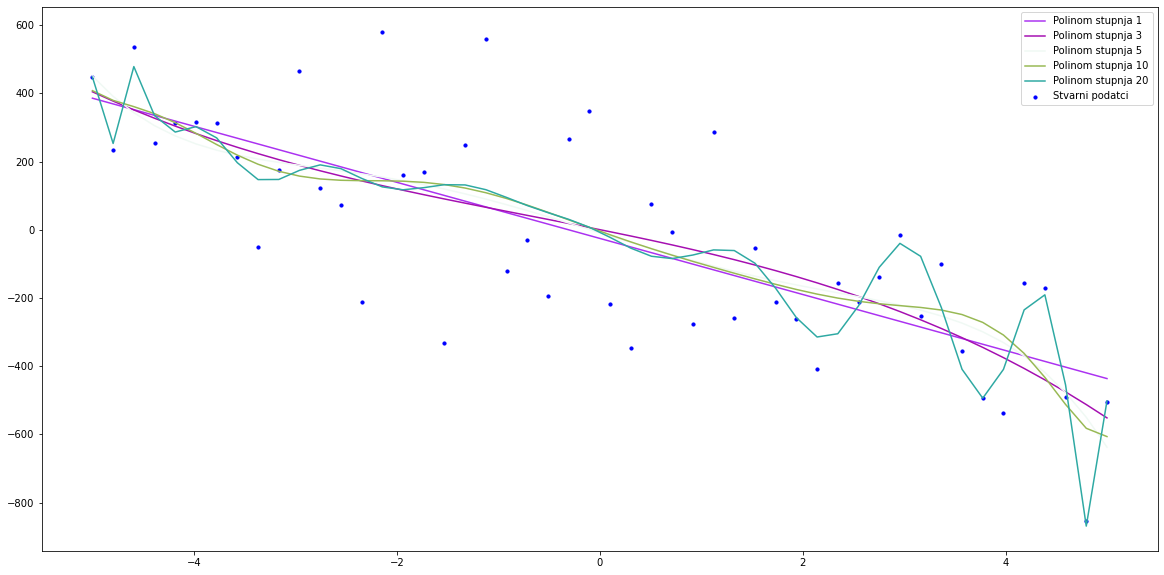

In [13]:
# Vaš kôd ovdje

plt.rcParams['figure.figsize']=(20,10)
figure = plt.figure()
axes = figure.add_subplot(111)
axes.scatter(X_2_a, y_2_a, s=10, c='b', label='Stvarni podatci')



for d in [1, 3, 5, 10, 20]:
    p = PolynomialFeatures(d, interaction_only=False)
    des_matrix = p.fit_transform(X_2_a)
    
    r = LinearRegression().fit(des_matrix, y_2_a)
    pred = r.predict(des_matrix)
    
    print('\nPogreška učenja za polinom stupnja '  + str(d) + ' : ' +  str(1/2 * len(y_2_a) * mean_squared_error(y_2_a, pred)))
    
    plt.plot(X_2_a, pred, color=np.random.rand(3,), label='Polinom stupnja '  + str(d))

plt.legend(loc='upper right');
plt.show()

### (b)

Razdvojite skup primjera iz zadatka 2 pomoću funkcije [`model_selection.train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) na skup za učenja i skup za ispitivanje u omjeru 1:1. Prikažite na jednom grafikonu pogrešku učenja i ispitnu pogrešku za modele polinomijalne regresije $\mathcal{H}_d$, sa stupnjem polinoma $d$ u rasponu $d\in [1,2,\ldots,20]$. Budući da kvadratna pogreška brzo raste za veće stupnjeve polinoma, umjesto da iscrtate izravno iznose pogrešaka, iscrtajte njihove logaritme.

**NB:** Podjela na skupa za učenje i skup za ispitivanje mora za svih pet modela biti identična.

**Q:** Je li rezultat u skladu s očekivanjima? Koji biste model odabrali i zašto?

**Q:** Pokrenite iscrtavanje više puta. U čemu je problem? Bi li problem bio jednako izražen kad bismo imali više primjera? Zašto?

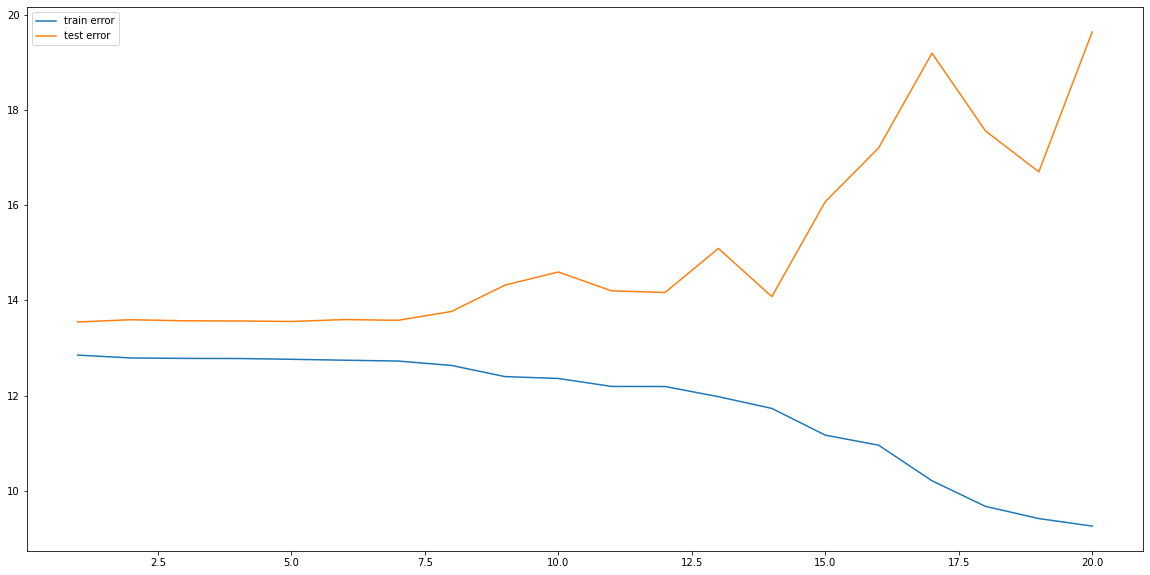

In [14]:
from sklearn.model_selection import train_test_split
# Vaš kôd ovdje

X_train, X_test, y_train, y_test = train_test_split(X_2_a, y_2_a, test_size=0.5)
D = list(range(1, 21))
train_error = []
test_error = []

for d in D:
    p = PolynomialFeatures(d, interaction_only=False)
    des_matrix_train = p.fit_transform(X_train)
    des_matrix_test = p.fit_transform(X_test)
    p.fit(X_train, y_train)
    
    r = LinearRegression().fit(des_matrix_train, y_train)
    pred_train = r.predict(des_matrix_train)
    pred_test = r.predict(des_matrix_test)
    
    train_error.append(1/2 * len(y_train) * mean_squared_error(y_train, pred_train))
    test_error.append(1/2 * len(y_test) * mean_squared_error(y_test, pred_test))
    

plt.plot(D, np.log(np.array(train_error)), label='train error')
plt.plot(D, np.log(np.array(test_error)), label='test error')
plt.legend(loc="upper left")
plt.show()

### (c)

Točnost modela ovisi o (1) njegovoj složenosti (stupanj $d$ polinoma), (2) broju primjera $N$, i (3) količini šuma. Kako biste to analizirali, nacrtajte grafikone pogrešaka kao u 3b, ali za različit $N\in$ (trećina, dvije trećine, sve) i količine šuma $\sigma\in\{100,200,500\}$ (ukupno 9 grafikona). Upotrijebite funkciju [`subplots`](http://matplotlib.org/examples/pylab_examples/subplots_demo.html) kako biste pregledno posložili grafikone u tablicu $3\times 3$. Podatci se generiraju na isti način kao u zadatku 2.

**NB:** Pobrinite se da svi grafikoni budu generirani nad usporedivim skupovima podataka, na sljedeći način. Generirajte najprije svih 1000 primjera, podijelite ih na skupove za učenje i skupove za ispitivanje (dva skupa od po 500 primjera). Zatim i od skupa za učenje i od skupa za ispitivanje načinite tri različite verzije, svaka s drugačijom količinom šuma (ukupno 2x3=6 verzija podataka). Kako bi simulirali veličinu skupa podataka, od tih dobivenih 6 skupova podataka uzorkujte trećinu, dvije trećine i sve podatke. Time ste dobili 18 skupova podataka -- skup za učenje i za testiranje za svaki od devet grafova.

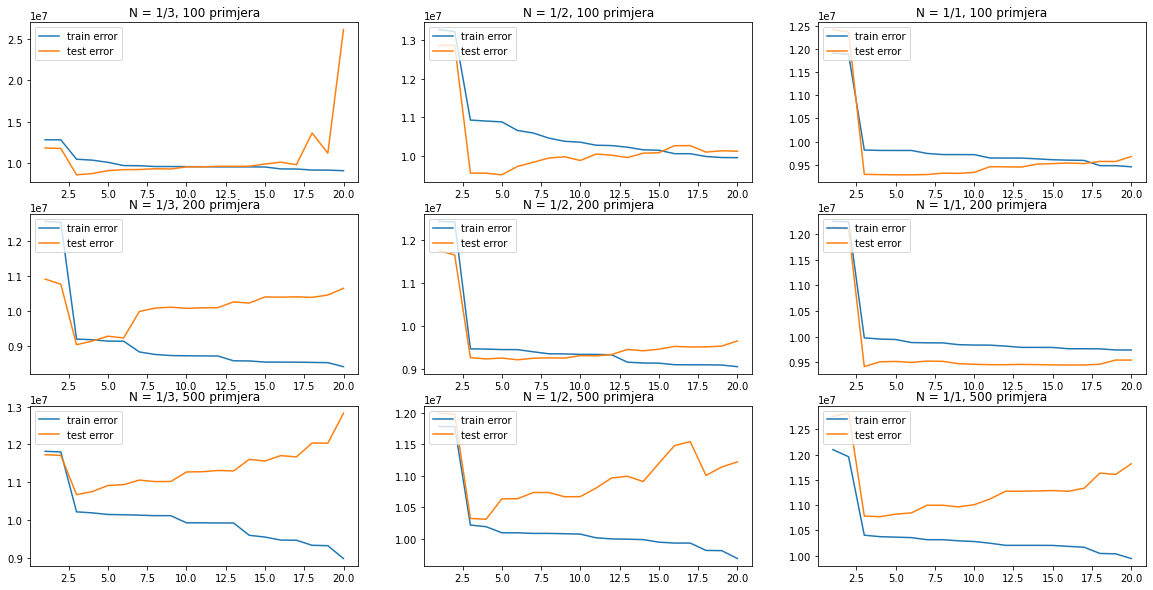

In [15]:
# Vaš kôd ovdje

X_matrix = make_instances(-5, 5, 1000)
D = list(range(1, 21))
train_error = []
test_error = []
z = 0

for i in [100, 200, 500]:
    X_train, X_test, y_train, y_test = train_test_split(X_matrix, make_labels(X_matrix, function, noise = i), test_size=0.5)
    for N in [3, 2, 1]:
        train_e = []
        test_e= []
        for d in D:
            # y_train = make_labels(X_train, function, noise = i)
            # y_test = make_labels(X_test, function, noise = i)
        
            p = PolynomialFeatures(d, interaction_only=False)
        
            des_matrix_train = p.fit_transform(X_train[:int(len(X_train)/N)])
            des_matrix_test = p.fit_transform(X_test[:int(len(X_test)/N)])
        
            r = LinearRegression().fit(des_matrix_train, y_train[:int(len(y_train)/N)])
            pred_train = r.predict(des_matrix_train)
            pred_test = r.predict(des_matrix_test)
            
            train_e.append(1/2 * len(y_train) * mean_squared_error(y_train[:int(len(y_train)/N)], pred_train))
            test_e.append(1/2 * len(y_test) * mean_squared_error(y_test[:int(len(y_test)/N)], pred_test))
            
        plt.subplot(3,3,z + 1)
        plt.plot(D, train_e, label='train error')
        plt.plot(D, test_e, label='test error')
        plt.title('N = 1/' + str(N) + ', ' + str(i) + ' primjera')
        plt.legend(loc="upper left")
        z = z + 1
            
    
        train_error.append(train_e)
        test_error.append(test_e)
        
        
# for i in range(0, 9):
#     plt.subplot(3,3,i + 1)
#     plt.plot(D, np.log(np.array(train_error[i])), label='train error')
#     plt.plot(D, np.log(np.array(test_error[i])), label='test error')
#     plt.title('My title')
#     plt.legend(loc="upper left")
plt.show()

***Q:*** Jesu li rezultati očekivani? Obrazložite.

### 4. Regularizirana regresija

### (a)

U gornjim eksperimentima nismo koristili **regularizaciju**. Vratimo se najprije na primjer iz zadatka 1. Na primjerima iz tog zadatka izračunajte težine $\mathbf{w}$ za polinomijalni regresijski model stupnja $d=3$ uz L2-regularizaciju (tzv. *ridge regression*), prema izrazu $\mathbf{w}=(\mathbf{\Phi}^\intercal\mathbf{\Phi}+\lambda\mathbf{I})^{-1}\mathbf{\Phi}^\intercal\mathbf{y}$. Napravite izračun težina za regularizacijske faktore $\lambda=0$, $\lambda=1$ i $\lambda=10$ te usporedite dobivene težine.

**Q:** Kojih je dimenzija matrica koju treba invertirati?

**Q:** Po čemu se razlikuju dobivene težine i je li ta razlika očekivana? Obrazložite.

In [16]:
# Vaš kôd ovdje

X = np.array([[0],[1],[2],[4]])
y = np.array([4,1,2,5])
I = np.identity(4)
I[0][0] = 0


poly = PolynomialFeatures(3, interaction_only=False)
design_matrix = poly.fit_transform(X)

for lamda in [0 , 1 , 10]:
    design_matrix_transpose = design_matrix.transpose()
    weights = np.dot(design_matrix_transpose, design_matrix)
    weights = weights + lamda * I
    weights = np.linalg.inv(weights)
    weights = np.dot(weights, design_matrix_transpose)
    weights = np.dot(weights, y)
    print('Težine za λ = ' + str(lamda) + ': ' + str(weights))

Težine za λ = 0: [ 4.         -5.91666667  3.375      -0.45833333]
Težine za λ = 1: [ 3.05696145 -0.69079365 -0.2831746   0.1445805 ]
Težine za λ = 10: [ 2.49444184 -0.15897295 -0.13423067  0.0815601 ]


### (b)

Proučite klasu [`Ridge`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge) iz modula [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model), koja implementira L2-regularizirani regresijski model. Parametar $\alpha$ odgovara parametru $\lambda$. Primijenite model na istim primjerima kao u prethodnom zadatku i ispišite težine $\mathbf{w}$ (atributi `coef_` i `intercept_`). Ponovno, pripazite na pomak.

**Q:** Jesu li težine identične onima iz zadatka 4a? Ako nisu, objasnite zašto je to tako i kako biste to popravili.

In [17]:
from sklearn.linear_model import Ridge
# Vaš kôd ovdje

for lamda in [0 , 1 , 10]:
    clf = Ridge(alpha=lamda)
    clf.fit(design_matrix, y)
    print('Težine ' + str(clf.coef_))
    print('Težina w0 -> ' + str(clf.intercept_) + '\n')

Težine [ 0.         -5.91666667  3.375      -0.45833333]
Težina w0 -> 4.000000000000025

Težine [ 0.         -0.69079365 -0.2831746   0.1445805 ]
Težina w0 -> 3.0569614512471652

Težine [ 0.         -0.15897295 -0.13423067  0.0815601 ]
Težina w0 -> 2.4944418431229733



### (c)

Vratimo se na slučaj $N=50$ slučajno generiranih primjera iz zadatka 2. Trenirajte modele polinomijalne regresije $\mathcal{H}_{\lambda,d}$ za $\lambda\in\{0,100\}$ i $d\in\{2,10\}$ (ukupno četiri modela). Skicirajte pripadne funkcije $h(\mathbf{x})$ i primjere (na jednom grafikonu; preporučujemo koristiti `plot` unutar `for` petlje).

**Q:** Jesu li rezultati očekivani? Obrazložite.

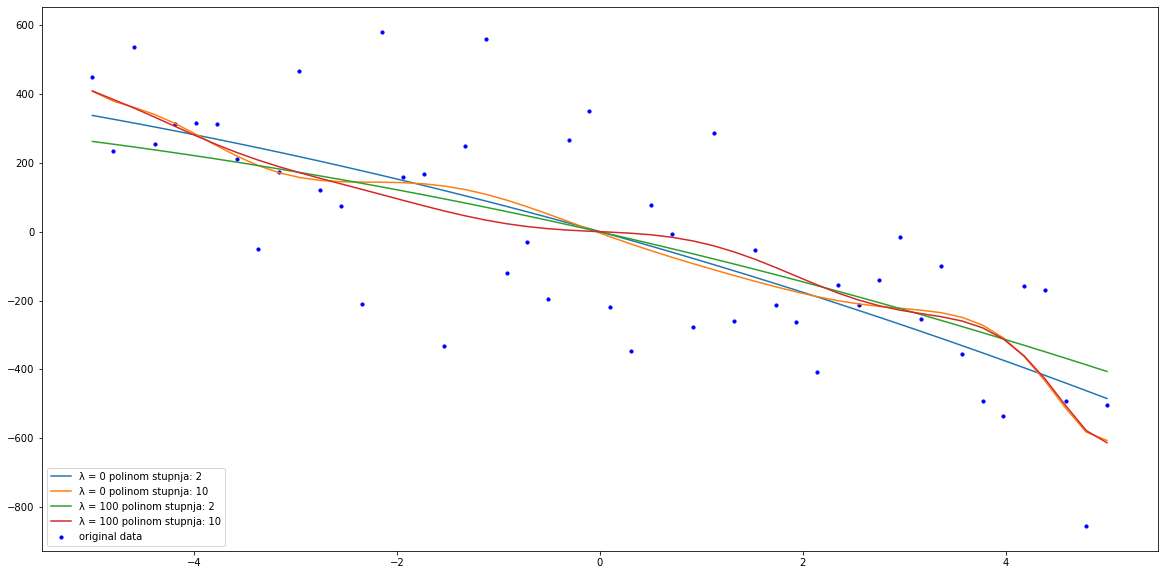

In [18]:
# Vaš kôd ovdje

figure = plt.figure()
axes = figure.add_subplot(111)
axes.scatter(X_2_a, y_2_a, s=10, c='b', label='original data')

for lamda in [0, 100]:
    for d in [2, 10]:
        poly = PolynomialFeatures(d, interaction_only=False)
        design_matrix = poly.fit_transform(X_2_a)
        clf = Ridge(alpha=lamda)
        clf.fit(design_matrix, y_2_a)
        y_pred = clf.predict(design_matrix)
        plt.plot(X_2_a, y_pred, label='λ = ' + str(lamda) + ' ' + 'polinom stupnja: ' + str(d) )
    

plt.legend(loc="lower left")
plt.show()

### (d)

Kao u zadataku 3b, razdvojite primjere na skup za učenje i skup za ispitivanje u omjeru 1:1. Prikažite krivulje logaritama pogreške učenja i ispitne pogreške u ovisnosti za model $\mathcal{H}_{d=10,\lambda}$, podešavajući faktor regularizacije $\lambda$ u rasponu $\lambda\in\{0,1,\dots,50\}$.

**Q:** Kojoj strani na grafikonu odgovara područje prenaučenosti, a kojoj podnaučenosti? Zašto?

**Q:** Koju biste vrijednosti za $\lambda$ izabrali na temelju ovih grafikona i zašto?


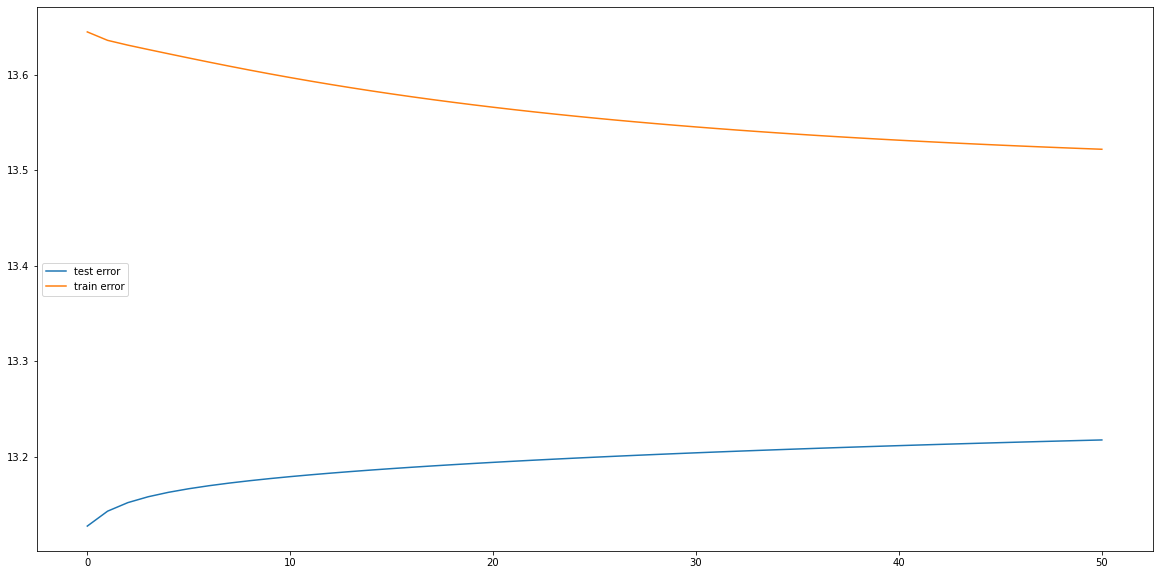

In [19]:
# Vaš kôd ovdje

X_train_5, X_test_5, y_train_5, y_test_5 = train_test_split(X_2_a, y_2_a, test_size=0.5)
poly = PolynomialFeatures(10, interaction_only=False)
train_error = []
test_error = []

for lamda in range(0,51):
    design_matrix_train = poly.fit_transform(X_train_5)
    design_matrix_test = poly.fit_transform(X_test_5)
    
    clf = Ridge(alpha=lamda)
    clf.fit(design_matrix_train, y_train_5)
    
    y_pred_train = clf.predict(design_matrix_train)
    y_pred_test = clf.predict(design_matrix_test)
    
    # print(clf.intercept_)
    # print(clf.coef_[1:])
    w = clf.coef_[1:]
    
    train_error.append(1/2 * len(y_train_5) * mean_squared_error(y_train_5, y_pred_train) + lamda/2 * np.linalg.norm(w)**2)
    test_error.append(1/2 * len(y_test_5) * mean_squared_error(y_test_5, y_pred_test) + lamda/2 * np.linalg.norm(w)**2)
    
plt.plot(list(range(0,51)), np.log(np.array(train_error)), label='test error')
plt.plot(list(range(0,51)), np.log(np.array(test_error)), label='train error')
plt.legend(loc="center left")
plt.show()

## Dodatni zadatci

Zadatci u nastavku (označeni zvjezdicom) nisu dio obaveznog dijela laboratorijske vježbe, niti nose bonus bodove. Dakle, nije ih potrebno riješiti kako biste ostvarili 100% bodova na ovoj laboratorijskoj vježbi. Međutim, preporučamo vam da ih pokušate riješiti i na terminu predaje prodiskutirate svoja rješenja s asistentima.

### *5. L1-regularizacija i L2-regularizacija

Svrha regularizacije jest potiskivanje težina modela $\mathbf{w}$ prema nuli, kako bi model bio što jednostavniji. Složenost modela može se okarakterizirati normom pripadnog vektora težina $\mathbf{w}$, i to tipično L2-normom ili L1-normom. Za jednom trenirani model možemo izračunati i broj ne-nul značajki, ili L0-normu, pomoću sljedeće funkcije koja prima vektor težina $\mathbf{w}$:

In [20]:
def nonzeroes(coef, tol=1e-6): 
    return len(coef) - len(coef[np.isclose(0, coef, atol=tol)])

### (a)

Za ovaj zadatak upotrijebite skup za učenje i skup za testiranje iz zadatka 3b. Trenirajte modele **L2-regularizirane** polinomijalne regresije stupnja $d=5$, mijenjajući hiperparametar $\lambda$ u rasponu $\{1,2,\dots,100\}$. Za svaki od treniranih modela izračunajte L{0,1,2}-norme vektora težina $\mathbf{w}$ te ih prikažite kao funkciju od $\lambda$. Pripazite što točno šaljete u funkciju za izračun normi.

**Q:** Objasnite oblik obiju krivulja. Hoće li krivulja za $\|\mathbf{w}\|_2$ doseći nulu? Zašto? Je li to problem? Zašto?

**Q:** Za $\lambda=100$, koliki je postotak težina modela jednak nuli, odnosno koliko je model rijedak?

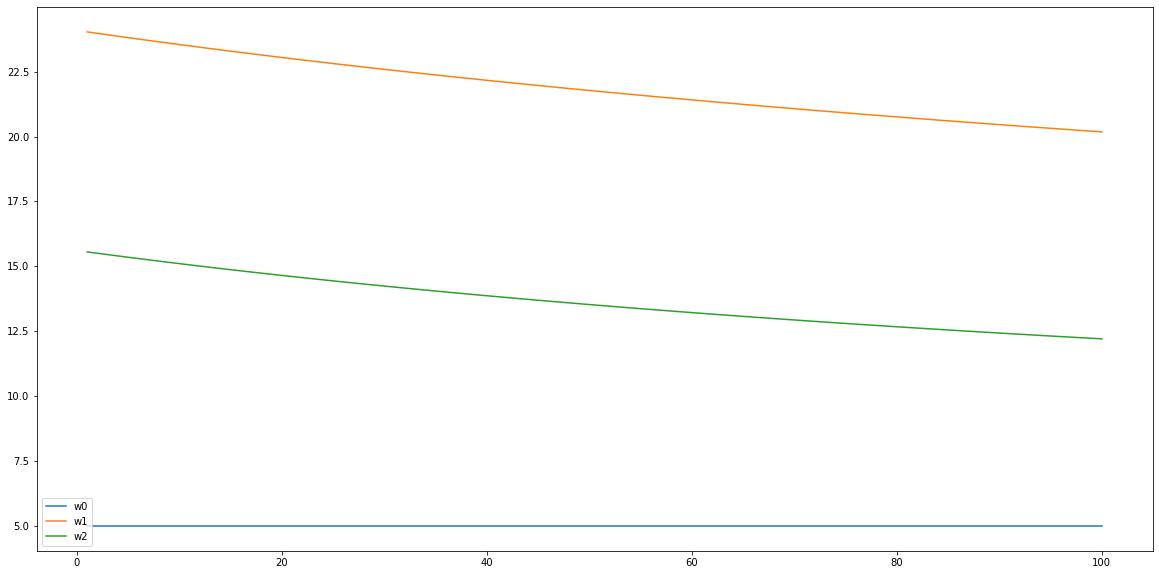

In [21]:
from sklearn.linear_model import Ridge
# Vaš kôd ovdje

poly = PolynomialFeatures(5, interaction_only=False)
L0_norm = []
L1_norm = []
L2_norm = []

design_matrix = poly.fit_transform(X_train)
for lamda in range(1,101):
    clf = Ridge(alpha=lamda)
    clf.fit(design_matrix, y_train)
    L0_norm.append(nonzeroes(clf.coef_))
    L1_norm.append(np.linalg.norm(clf.coef_, ord = 1))
    L2_norm.append(np.linalg.norm(clf.coef_))
    
plt.plot(list(range(1,101)), L0_norm, label='w0')
plt.plot(list(range(1,101)), L1_norm, label='w1')
plt.plot(list(range(1,101)), L2_norm, label='w2')
plt.legend(loc="lower left")
plt.show()

### (b)

Glavna prednost L1-regularizirane regresije (ili *LASSO regression*) nad L2-regulariziranom regresijom jest u tome što L1-regularizirana regresija rezultira **rijetkim modelima** (engl. *sparse models*), odnosno modelima kod kojih su mnoge težine pritegnute na nulu. Pokažite da je to doista tako, ponovivši gornji eksperiment s **L1-regulariziranom** regresijom, implementiranom u klasi  [`Lasso`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) u modulu [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model).

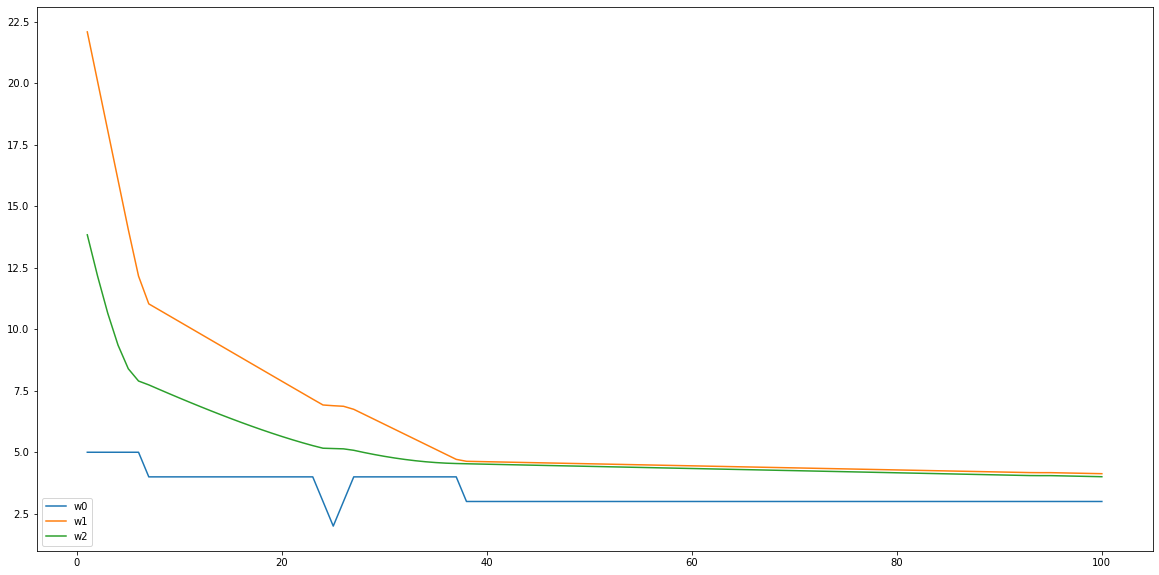

In [22]:
from sklearn.linear_model import Lasso
# Vaš kôd ovdje

poly = PolynomialFeatures(5, interaction_only=False)
L0_norm = []
L1_norm = []
L2_norm = []

design_matrix = poly.fit_transform(X_train)
for lamda in range(1,101):
    clf = Lasso(alpha=lamda)
    clf.fit(design_matrix, y_train)
    L0_norm.append(nonzeroes(clf.coef_))
    L1_norm.append(np.linalg.norm(clf.coef_, ord = 1))
    L2_norm.append(np.linalg.norm(clf.coef_))
    
plt.plot(list(range(1,101)), L0_norm, label='w0')
plt.plot(list(range(1,101)), L1_norm, label='w1')
plt.plot(list(range(1,101)), L2_norm, label='w2')
plt.legend(loc="lower left")
plt.show()

### *6. Značajke različitih skala

Često se u praksi možemo susreti sa podatcima u kojima sve značajke nisu jednakih magnituda. Primjer jednog takvog skupa je regresijski skup podataka `grades` u kojem se predviđa prosjek ocjena studenta na studiju (1--5) na temelju dvije značajke: bodova na prijamnom ispitu (1--3000) i prosjeka ocjena u srednjoj školi. Prosjek ocjena na studiju izračunat je kao težinska suma ove dvije značajke uz dodani šum.

Koristite sljedeći kôd kako biste generirali ovaj skup podataka.

In [23]:
n_data_points = 500
np.random.seed(69)

# Generiraj podatke o bodovima na prijamnom ispitu koristeći normalnu razdiobu i ograniči ih na interval [1, 3000].
exam_score = np.random.normal(loc=1500.0, scale = 500.0, size = n_data_points) 
exam_score = np.round(exam_score)
exam_score[exam_score > 3000] = 3000
exam_score[exam_score < 0] = 0

# Generiraj podatke o ocjenama iz srednje škole koristeći normalnu razdiobu i ograniči ih na interval [1, 5].
grade_in_highschool = np.random.normal(loc=3, scale = 2.0, size = n_data_points)
grade_in_highschool[grade_in_highschool > 5] = 5
grade_in_highschool[grade_in_highschool < 1] = 1

# Matrica dizajna.
grades_X = np.array([exam_score,grade_in_highschool]).T

# Završno, generiraj izlazne vrijednosti.
rand_noise = np.random.normal(loc=0.0, scale = 0.5, size = n_data_points)
exam_influence = 0.9
grades_y = ((exam_score / 3000.0) * (exam_influence) + (grade_in_highschool / 5.0) \
            * (1.0 - exam_influence)) * 5.0 + rand_noise
grades_y[grades_y < 1] = 1
grades_y[grades_y > 5] = 5

### a)

Iscrtajte ovisnost ciljne vrijednosti (y-os) o prvoj i o drugoj značajki (x-os). Iscrtajte dva odvojena grafa.

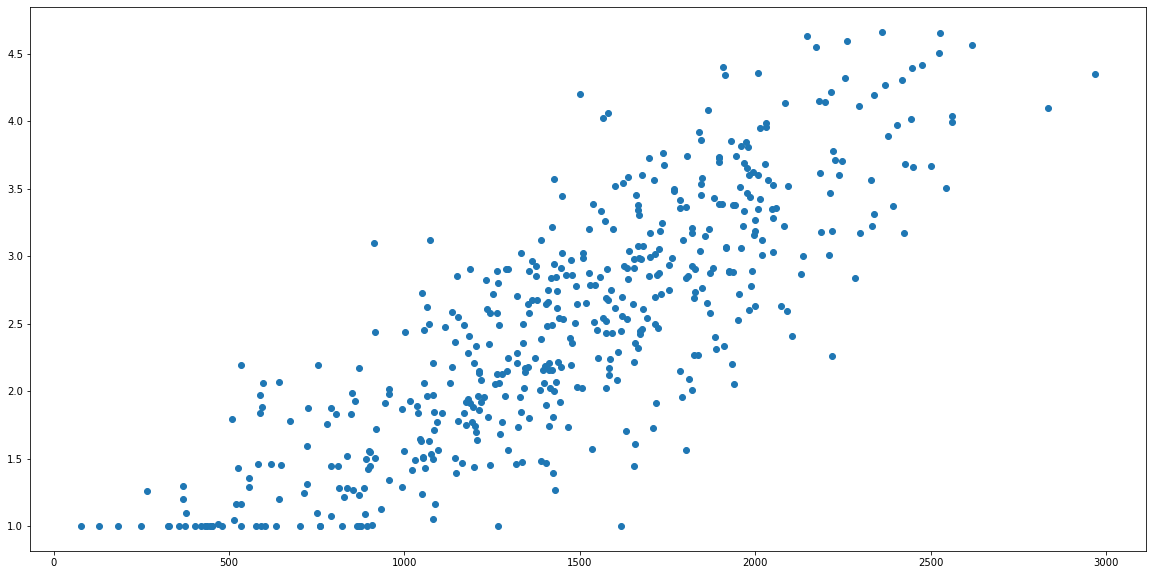

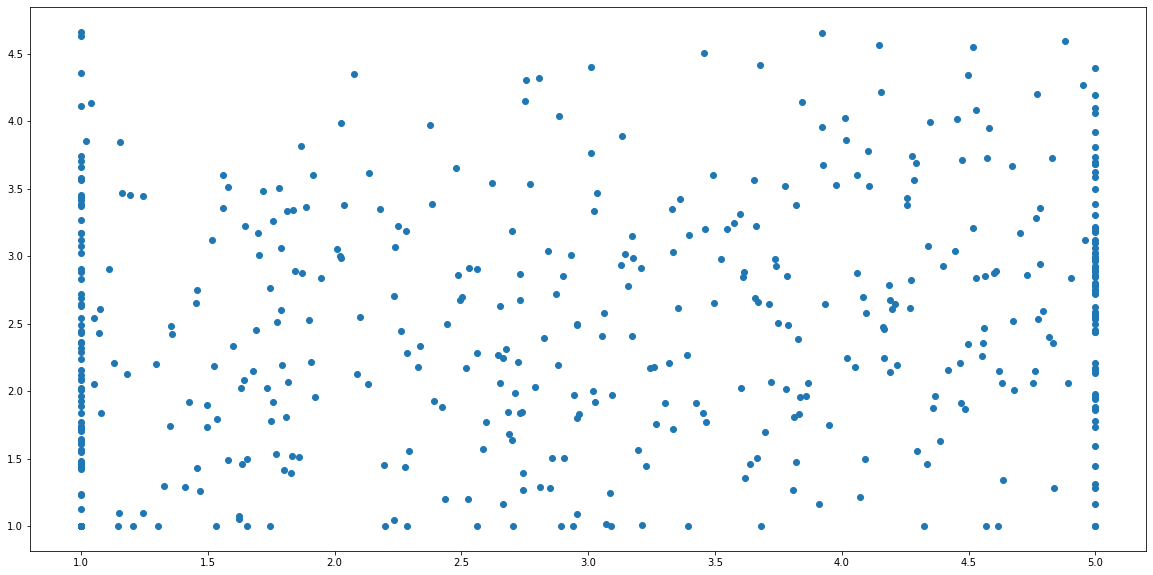

In [24]:
# Vaš kôd ovdje

plt.scatter(exam_score, grades_y)
plt.show()
plt.scatter(grade_in_highschool, grades_y)
plt.show()

### b)

Naučite model L2-regularizirane regresije ($\lambda = 0.01$), na podacima `grades_X` i `grades_y`:

In [25]:
# Vaš kôd ovdje

clf = Ridge(alpha=0.01)
clf.fit(grades_X, grades_y)
grades_y_pred = clf.predict(grades_X)
print('Težine ' + str(clf.coef_))
print('Težina w0 -> ' + str(clf.intercept_) + '\n')

Težine [0.00141497 0.09477276]
Težina w0 -> 0.15061179575776018



Sada ponovite gornji eksperiment, ali prvo skalirajte podatke `grades_X` i `grades_y` i spremite ih u varijable `grades_X_fixed` i `grades_y_fixed`. Za tu svrhu, koristite [`StandardScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).

In [26]:
from sklearn.preprocessing import StandardScaler
# Vaš kôd ovdje

scaler = StandardScaler()

grades_X_fixed = scaler.fit_transform(grades_X)
grades_y_fixed = scaler.fit_transform(grades_y.reshape(-1, 1))

clf = Ridge(alpha=0.01)
clf.fit(grades_X_fixed, grades_y_fixed)
print('Težine ' + str(clf.coef_))
print('Težina w0 -> ' + str(clf.intercept_) + '\n')
grades_y_pred = clf.predict(grades_X_fixed)

Težine [[0.81630375 0.15167761]]
Težina w0 -> [8.62551331e-17]



**Q:** Gledajući grafikone iz podzadatka (a), koja značajka bi trebala imati veću magnitudu, odnosno važnost pri predikciji prosjeka na studiju? Odgovaraju li težine Vašoj intuiciji? Objasnite.  

### *7. Multikolinearnost

### a)

Izradite skup podataka `grades_X_fixed_colinear` tako što ćete u skupu `grades_X_fixed` iz
zadatka *7b* duplicirati zadnji stupac (ocjenu iz srednje škole). Time smo efektivno uveli savršenu multikolinearnost.

In [27]:
# Vaš kôd ovdje

grades_X_fixed_colinear = np.hstack([grades_X_fixed, np.reshape(grades_X_fixed[:, 1], (-1, 1))])
print(grades_X_fixed_colinear)

[[ 0.95063817 -0.78607869 -0.78607869]
 [-0.50343434 -0.50193004 -0.50193004]
 [ 1.18596832 -0.52213172 -0.52213172]
 ...
 [-0.31593552  0.80074234  0.80074234]
 [ 0.81288393  1.24783236  1.24783236]
 [-0.01938126  1.21729714  1.21729714]]


Ponovno, naučite na ovom skupu L2-regularizirani model regresije ($\lambda = 0.01$).

In [28]:
# Vaš kôd ovdje

clf = Ridge(alpha=0.01)
clf.fit(grades_X_fixed_colinear, grades_y_fixed)
grades_y_pred = clf.predict(grades_X_fixed_colinear)
print('Težine ' + str(clf.coef_))
print('Težina w0 -> ' + str(clf.intercept_) + '\n')

Težine [[0.81630364 0.07583957 0.07583957]]
Težina w0 -> [8.6255971e-17]



**Q:** Usporedite iznose težina s onima koje ste dobili u zadatku *7b*. Što se dogodilo?

### b)

Slučajno uzorkujte 50% elemenata iz skupa `grades_X_fixed_colinear` i naučite dva modela L2-regularizirane regresije, jedan s $\lambda=0.01$ i jedan s $\lambda=1000$). Ponovite ovaj pokus 10 puta (svaki put s drugim podskupom od 50% elemenata).  Za svaki model, ispišite dobiveni vektor težina u svih 10 ponavljanja te ispišite standardnu devijaciju vrijednosti svake od težina (ukupno šest standardnih devijacija, svaka dobivena nad 10 vrijednosti).

In [29]:
# Vaš kôd ovdje

from statistics import stdev

w0 = []
w1 = []
w2 = []

for lamda in [0.01, 1000]:
    for i in range(0, 10):
        grades_X_fixed_colinear_train, grades_X_fixed_colinear_test, y_grades_train, y_grades_test = train_test_split(grades_X_fixed_colinear, grades_y_fixed, test_size=0.5)
        clf = Ridge(alpha=lamda)
        clf.fit(grades_X_fixed_colinear_train, y_grades_train)
        w0.append(clf.coef_[0][0])
        w1.append(clf.coef_[0][1])
        w2.append(clf.coef_[0][2])         
#         print(clf.intercept_)
#         print(clf.coef_)
#         print()
    print('Standardna devijacija w0 za  λ= ' + str(lamda) + ': ' + str(stdev(w0)))
    print('Standardna devijacija w1 za  λ= ' + str(lamda) + ': ' + str(stdev(w1)))
    print('Standardna devijacija w2 za  λ= ' + str(lamda) + ': ' + str(stdev(w2)))

Standardna devijacija w0 za  λ= 0.01: 0.011623180539487023
Standardna devijacija w1 za  λ= 0.01: 0.01282772606996081
Standardna devijacija w2 za  λ= 0.01: 0.012827726071738188
Standardna devijacija w0 za  λ= 1000: 0.33305808071824344
Standardna devijacija w1 za  λ= 1000: 0.021607139323060836
Standardna devijacija w2 za  λ= 1000: 0.021607139324208116


**Q:** Kako regularizacija utječe na stabilnost težina?  
**Q:** Jesu li koeficijenti jednakih magnituda kao u prethodnom pokusu? Objasnite zašto.